In [2]:
import time
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt

In [29]:
client = MongoClient('mongodb://mesiin592022-0022.westeurope.cloudapp.azure.com:30000/')
db = client['SalesDB']
collection = db['Unique_table']

requests = {
    'R1': [{'$match': {"FirstName_customer": "Joseph"}},{'$project': {"SalesID":1,"FirstName_customer":1,"_id":0}}],
    'R2': [{'$match': {'LastName_employee': 'Ringer'}}, {'$group': {'_id': '$LastName_employee','Sum of quantity': {'$sum': '$Quantity'}}}],
    'R3': [{'$match': {"Name":{ '$regex' : 'de', '$options' : 'i' }, "Price":{'$lt': 500}}},{'$project': {"SalesID":1,"Price":1,"_id":0}}],
    'R4': [{'$match': {'$expr': {'$lt': [{'$strLenCP': '$FirstName_employee'},{'$strLenCP': '$LastName_customer'}]}}}, {'$project': {'Name': 1,'FirstName_employee': 1,'LastName_customer': 1,'_id': 0}}],
    'R5': [{'$group': {'_id': '$CustomerID','FirstName_customer': {'$first': '$FirstName_customer'},'LastName_customer': {'$first': '$LastName_customer'},'MiddleInitial_employee': {'$first': '$MiddleInitial_employee'},'Somme du nombre d\'achats': {'$sum': '$Quantity'}}}, {'$match': {'MiddleInitial_employee': 'e','Somme du nombre d\'achats': {'$gte': 1000}}}, {'$project': {'FirstName_customer': 1,'LastName_customer': 1,'_id': 0}}, {'$sort': {'LastName_customer': 1}}],
    'R6': [{'$project': {'Benefit': {'$multiply': ['$Quantity','$Price']},'EmployeeID': 1,'FirstName_employee': 1,'Quantity': 1,'CustomerID': 1,'Price': 1}}, {'$group': {'_id': {'EmployeeID': '$EmployeeID','CustomerID': '$CustomerID'},'CustomerID': {'$first': '$CustomerID'},'EmployeeID': {'$first': '$EmployeeID'},'FirstName_employee': {'$first': '$FirstName_employee'},'Somme des benefices': {'$sum': '$Benefit'}}}, {'$sort': {'Somme des benefices': 1}}, {'$limit': 1}, {'$project': {'FirstName_employee': 1,'_id': 0}}],
    'R7': [{'$match': {'$expr': {'$ne': ['$FirstName_customer','$FirstName_employee']}}}, {'$group': {'_id': {'CustomerID': '$CustomerID','LastName_employee': '$LastName_employee'},'LastName_customer': {'$first': '$LastName_customer'},'DistinctCount': {'$sum': 1}}}, {'$match': {'DistinctCount': {'$gte': 3}}}, {'$project': {'LastName_customer': 1,'_id': 0}}, {'$sort': {'LastName_customer': 1}}],
    'R8': [{'$match': {'MiddleInitial_employee': 'r'}}, {'$group': {'_id': {'EmployeeID': '$EmployeeID','ProductID': '$ProductID'},'Name': {'$first': '$Name'},'Nb': {'$sum': '$Quantity'}}}, {'$sort': {'Nb': -1}}, {'$limit': 1}, {'$project': {'Name': 1,'Nb': 1,'_id': 0}}]
}

response_times = []
for k, v in requests.items():
    print(k)
    duration = 0
    for i in range(10):
        start = time.perf_counter()
        result = collection.aggregate(v)
        elapsed = time.perf_counter() - start
        duration += elapsed
    response_times.append({
        "Request": k,
        "Reponse_time": duration/10
    })

response_times = pd.DataFrame(response_times)

R1
R2
R3
R4
R5
R6
R7
R8


In [32]:
response_times.to_csv("Response_times_8_shards_config2.csv", index=False)

In [33]:
response_times

,Request,Reponse_time
0,R1,0.023239
1,R2,0.824608
2,R3,0.588210
3,R4,0.624094
4,R5,2.362888
5,R6,3.718621
6,R7,2.852190
7,R8,1.079485


# Courbes

In [34]:
# Sharding on LastName_employee
shard1_1 = pd.read_csv("Response_times_1_shard_config1.csv")
shard2_1 = pd.read_csv("Response_times_2_shards_config1.csv")
shard3_1 = pd.read_csv("Response_times_3_shards_config1.csv")
shard4_1 = pd.read_csv("Response_times_4_shards_config1.csv")
shard5_1 = pd.read_csv("Response_times_5_shards_config1.csv")
shard6_1 = pd.read_csv("Response_times_6_shards_config1.csv")
shard7_1 = pd.read_csv("Response_times_7_shards_config1.csv")
shard8_1 = pd.read_csv("Response_times_8_shards_config1.csv")

# Sharding on FirstName_customer
shard1_2 = pd.read_csv("Response_times_1_shard_config2.csv")
shard2_2 = pd.read_csv("Response_times_2_shards_config2.csv")
shard3_2 = pd.read_csv("Response_times_3_shards_config2.csv")
shard4_2 = pd.read_csv("Response_times_4_shards_config2.csv")
shard5_2 = pd.read_csv("Response_times_5_shards_config2.csv")
shard6_2 = pd.read_csv("Response_times_6_shards_config2.csv")
shard7_2 = pd.read_csv("Response_times_7_shards_config2.csv")
shard8_2 = pd.read_csv("Response_times_8_shards_config2.csv")

In [35]:
all_shards_1 = shard1_1.merge(
    shard2_1, on="Request", suffixes=('_1', '_2'))\
    .merge(shard3_1, on="Request")\
    .merge(shard4_1, on="Request", suffixes=('_3', '_4'))\
    .merge(shard5_1, on="Request")\
    .merge(shard6_1, on="Request", suffixes=('_5', '_6'))\
    .merge(shard7_1, on="Request")\
    .merge(shard8_1, on="Request", suffixes=('_7', '_8'))
all_shards_1.columns = ["Request", "1", "2", "3", "4", "5", "6", "7", "8"]

all_shards_2 = shard1_2.merge(
    shard2_2, on="Request", suffixes=('_1', '_2'))\
    .merge(shard3_2, on="Request")\
    .merge(shard4_2, on="Request", suffixes=('_3', '_4'))\
    .merge(shard5_2, on="Request")\
    .merge(shard6_2, on="Request", suffixes=('_5', '_6'))\
    .merge(shard7_2, on="Request")\
    .merge(shard8_2, on="Request", suffixes=('_7', '_8'))
all_shards_2.columns = ["Request", "1", "2", "3", "4", "5", "6", "7", "8"]

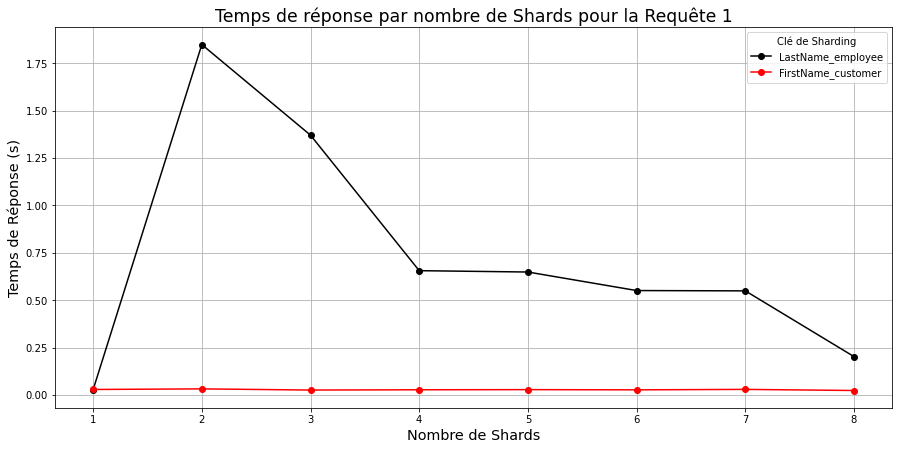

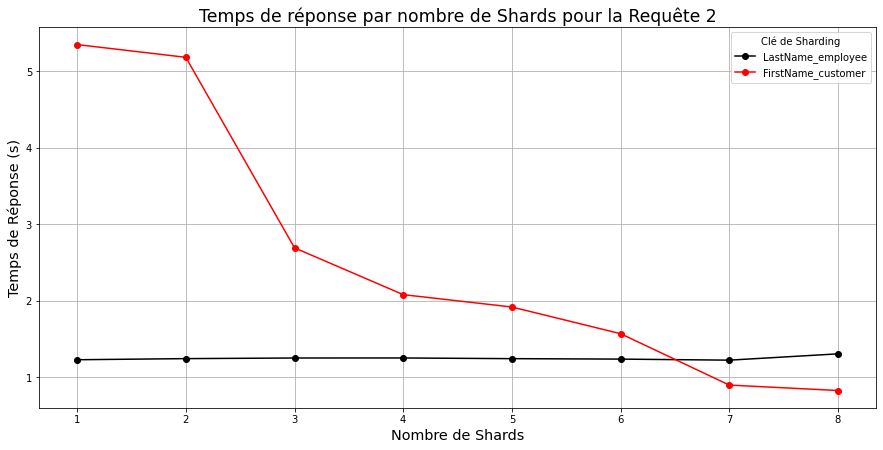

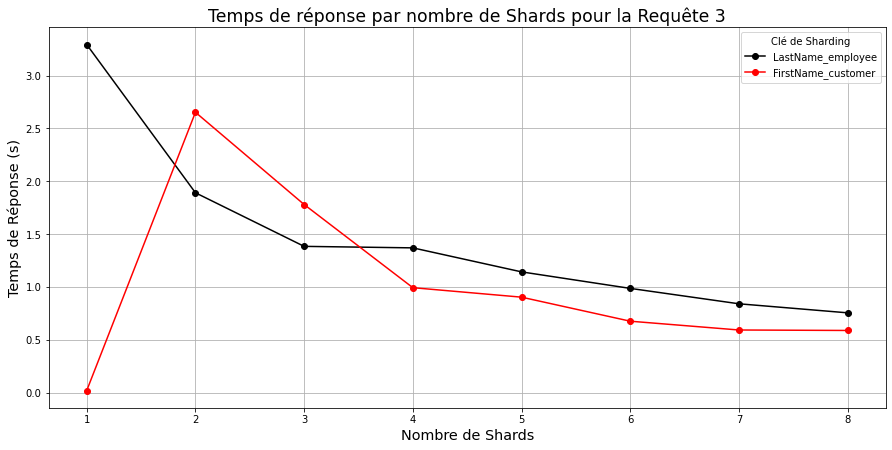

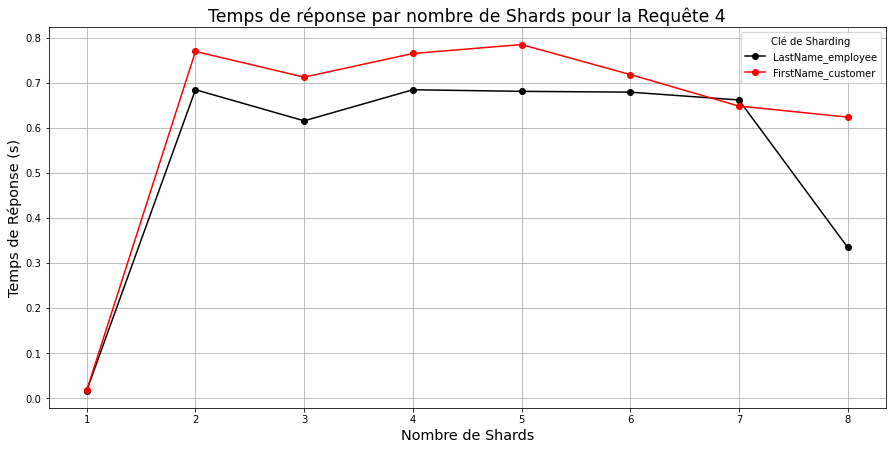

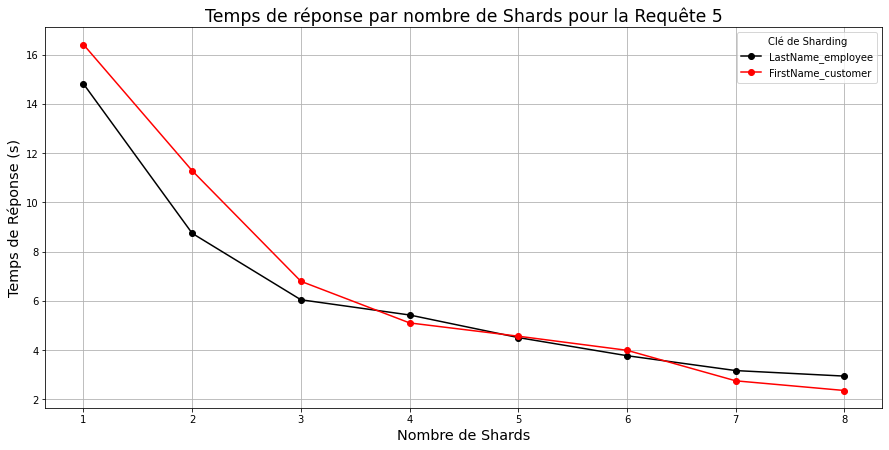

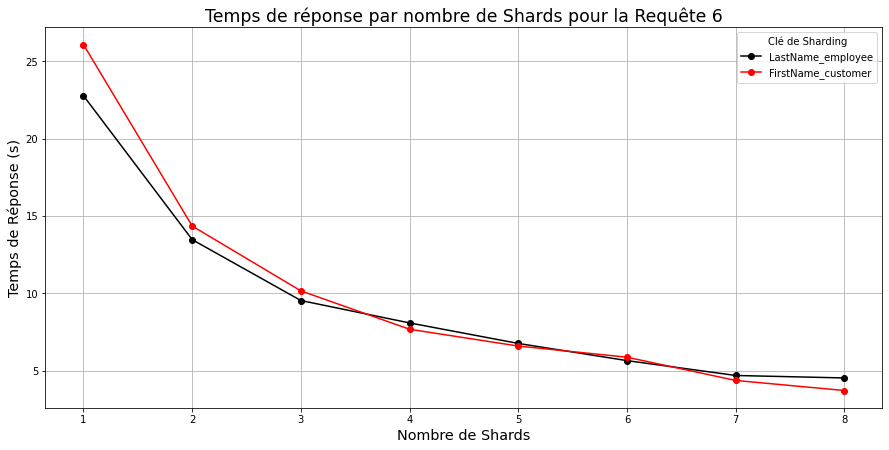

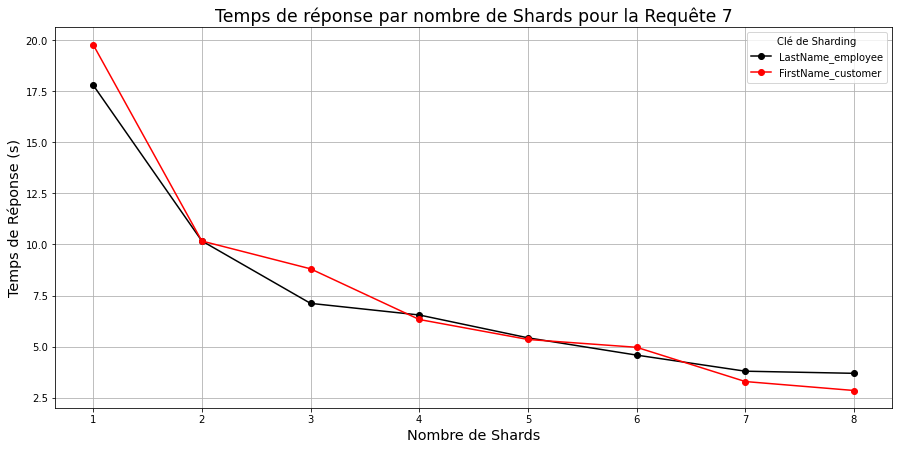

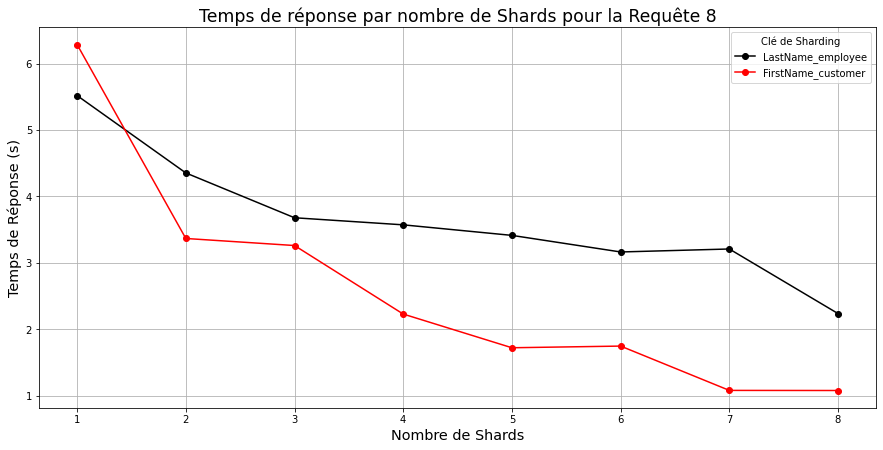

In [36]:
CUSTOM_PALETTE = ['#000000','#FF0000']

for i in range(len(all_shards_1)):
    fig, ax = plt.subplots(figsize=(15,7))
    plt.plot(all_shards_1.columns[1:], all_shards_1.iloc[i][1:], marker='o', color=CUSTOM_PALETTE[0])
    plt.plot(all_shards_2.columns[1:], all_shards_2.iloc[i][1:], marker='o', color=CUSTOM_PALETTE[1])
    plt.legend(["LastName_employee", "FirstName_customer"], title="Clé de Sharding")
    plt.grid()
    plt.title(f"Temps de réponse par nombre de Shards pour la Requête {i+1}", fontsize="xx-large")
    plt.xlabel("Nombre de Shards", fontsize="x-large")
    plt.ylabel("Temps de Réponse (s)", fontsize="x-large")
    plt.savefig(f"Shards_{i+1}.png")
    plt.show()